In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('homeprices2.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


## Transform the town column into dummy variables

In [5]:
dummies = pd.get_dummies(df['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [6]:
merged = pd.concat([df, dummies], axis = 1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


## drop the town column from the table

In [7]:
final = merged.drop('town', axis = 1)
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [8]:
X = final.drop('price', axis = 1)
X

,area,monroe township,robinsville,west windsor
0,2600,1,0,0
1,3000,1,0,0
2,3200,1,0,0
3,3600,1,0,0
4,4000,1,0,0
5,2600,0,0,1
6,2800,0,0,1
7,3300,0,0,1
8,3600,0,0,1
9,2600,0,1,0


In [9]:
y = final['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
predictions = model.predict(X_test)

In [16]:
predictions

array([689654.81171548, 613333.33333333, 662482.56624825, 603643.65411437])

In [17]:
y_test

12    695000
2     610000
3     680000
10    600000
Name: price, dtype: int64

In [21]:
k = model.predict([[2600, 1, 0, 0]])
k

array([539609.48396095])

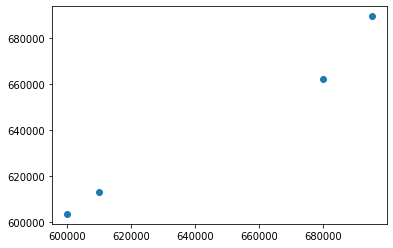

In [23]:
plt.scatter(y_test, predictions);

c:\users\user\pycharmprojects\workplace23\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


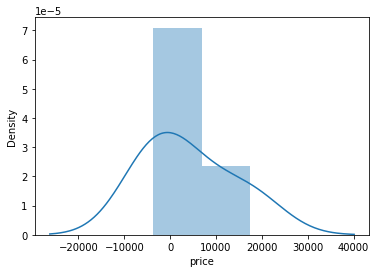

In [25]:
sns.distplot(y_test - predictions);

## Errors in the dataset

In [26]:
from sklearn import metrics

In [28]:
MAE = metrics.mean_absolute_error(y_test, predictions)
print("MAE = ", MAE)

MAE =  7459.902370993164


## the mean squarred error of the distribution

In [30]:
MSE = metrics.mean_squared_error(y_test, predictions)
print('MSE = ', MSE)

MSE =  89954712.36504585


## Root Mean_squared error

In [31]:
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE)

RMSE =  9484.445812225713


## Variance from the real dataset

In [32]:
metrics.explained_variance_score(y_test, predictions)

0.9574198381503494

## Another method of predicting linear regression

In [35]:
import statsmodels.api as sm

In [39]:
model = sm.OLS(y_train, X_train)

In [40]:
model

In [41]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     35.05
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000880
Time:                        19:44:01   Log-Likelihood:                -97.704
No. Observations:                   9   AIC:                             203.4
Df Residuals:                       5   BIC:                             204.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area              122.8731     12.571     

c:\users\user\pycharmprojects\workplace23\venv\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [43]:
final['predicions'] = result.fittedvalues

In [44]:
final

,area,price,monroe township,robinsville,west windsor,predicions
0,2600,550000,1,0,0,539609.483961
1,3000,565000,1,0,0,588758.716876
2,3200,610000,1,0,0,NaN
3,3600,680000,1,0,0,NaN
4,4000,725000,1,0,0,711631.799163
5,2600,585000,0,0,1,581635.285914
6,2800,615000,0,0,1,606209.902371
7,3300,650000,0,0,1,667646.443515
8,3600,710000,0,0,1,704508.368201
9,2600,575000,0,1,0,566781.729428


In [45]:
x = result.predict([2600, 1, 0, 0])
x

array([539609.48396095])

<AxesSubplot:xlabel='area', ylabel='price'>

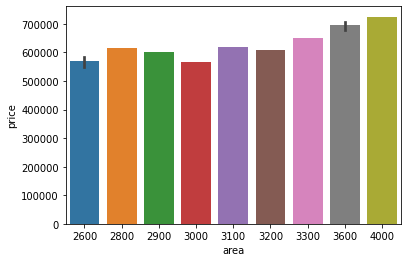

In [47]:
sns.barplot(x = final['area'], y = final['price'], data = final)

In [49]:
#sns.barplot(x = df['town'], y = df['price'], data = final)